# Quantum tomography W-checker


Check for the hidden state is W state or not?

<img src='../../images/binho_checkstate.png' width = 500px/>

The $U_{gen}$ is generated from n-layers circuit:

<img src='../../images/complex_n_layer.png' width = 500px/>

the $U_{target}$ is constructing W circuit inverse:

<img src='../../images/check_w_state.png'/>

In [1]:
import qiskit, sys
import numpy as np, matplotlib.pyplot as plt
sys.path.insert(1, '../')
import qtm.base, qtm.constant, qtm.nqubit, qtm.onequbit, qtm.custom_gate

In [70]:
# Init parameters
num_qubits = 10 
# For arbitrary initial state
num_layers = 2
thetas = np.ones(num_qubits*num_layers*5)
# For determine W state

qc = qiskit.QuantumCircuit(num_qubits, num_qubits)
thetass, loss_values = qtm.base.fit(
    qc, num_steps = 100, thetas = thetas, 
    create_circuit_func = qtm.nqubit.create_Wchecker_koczor, 
    grad_func = qtm.base.grad_loss,
    loss_func = qtm.base.loss_fubini_study,
    optimizer = qtm.base.adam,
    verbose = 1,
    num_layers = num_layers,
    is_return_all_thetas = True
)

Step: 100%|██████████| 100/100 [34:05<00:00, 20.46s/it]


In [71]:
np.savetxt("../../experiments/linear_ansatz_w/" + str(num_qubits) + "/loss_values_adam.csv", loss_values, delimiter=",")
np.savetxt("../../experiments/linear_ansatz_w/" + str(num_qubits) + "/thetass_adam.csv", thetass, delimiter=",")

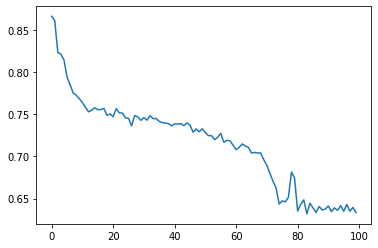

In [72]:
plt.plot(loss_values)

In [73]:
traces, fidelities = [], []
for thetas in thetass:
    # Get |psi> = U_gen|000...>
    qc = qiskit.QuantumCircuit(num_qubits, num_qubits)
    qc = qtm.nqubit.create_koczor_state(qc, thetas, num_layers = num_layers)
    psi = qiskit.quantum_info.Statevector.from_instruction(qc)
    rho_psi = qiskit.quantum_info.DensityMatrix(psi)
    # Get |psi~> = U_target|000...>
    qc1 = qiskit.QuantumCircuit(num_qubits, num_qubits)
    qc1 = qtm.nqubit.create_w_state(qc1)
    psi_hat = qiskit.quantum_info.Statevector.from_instruction(qc1)
    rho_psi_hat = qiskit.quantum_info.DensityMatrix(psi_hat)
    # Calculate the metrics
    trace, fidelity = qtm.base.get_metrics(psi, psi_hat)
    traces.append(trace)
    fidelities.append(fidelity)
np.savetxt("../../experiments/linear_ansatz_w/" + str(num_qubits) + "/traces_adam.csv", traces, delimiter=",")
np.savetxt("../../experiments/linear_ansatz_w/" + str(num_qubits) + "/fidelities_adam.csv", fidelities, delimiter=",")